# FIFA Dataset Analysis

#### Import libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [3]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')


### Read dataset

In this kernel, I will focus on those datasets which help to explain various features of Seaborn.  So, I will read the related datasets with pandas read_csv() function.

In [24]:
fifa = pd.read_csv(r'C:/Users/Rachana Jena/Downloads/9th- Seaborn, Eda practicle\9th- Seaborn, Eda practicle/Seaborn/FIFA.csv', index_col=0)


In [25]:
fifa

ID                Name  Age  \
0      158023            L. Messi   31   
1       20801   Cristiano Ronaldo   33   
2      190871           Neymar Jr   26   
3      193080              De Gea   27   
4      192985        K. De Bruyne   27   
...       ...                 ...  ...   
18202  238813        J. Lundstram   19   
18203  243165  N. Christoffersson   19   
18204  241638           B. Worman   16   
18205  246268      D. Walker-Rice   17   
18206  246269           G. Nugent   16   

                                                Photo Nationality  \
0      https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1       https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2      https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3      https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4      https://cdn.sofifa.org/players/4/19/192985.png     Belgium   
...                                               ...         ...   
18202  https://cdn.sofifa.org/players/4/19/238813.png     England   
18203  https://cdn.sofifa.org/players/4/19/243165.png      Sweden   
18204  https://cdn.sofifa.org/players/4/19/241638.png     England   
18205  https://cdn.sofifa.org/players/4/19/246268.png     England   
18206  https://cdn.sofifa.org/players/4/19/246269.png     England   

                                      Flag  Overall  Potential  \
0      https://cdn.sofifa.org/flags/52.png       94         94   
1      https://cdn.sofifa.org/flags/38.png       94         94   
2      https://cdn.sofifa.org/flags/54.png       92         93   
3      https://cdn.sofifa.org/flags/45.png       91         93   
4       https://cdn.sofifa.org/flags/7.png       91         92   
...                                    ...      ...        ...   
18202  https://cdn.sofifa.org/flags/14.png       47         65   
18203  https://cdn.sofifa.org/flags/46.png       47         63   
18204  https://cdn.sofifa.org/flags/14.png       47         67   
18205  https://cdn.sofifa.org/flags/14.png       47         66   
18206  https://cdn.sofifa.org/flags/14.png       46         66   

                      Club                                       Club Logo  \
0             FC Barcelona    https://cdn.sofifa.org/teams/2/light/241.png   
1                 Juventus     https://cdn.sofifa.org/teams/2/light/45.png   
2      Paris Saint-Germain     https://cdn.sofifa.org/teams/2/light/73.png   
3        Manchester United     https://cdn.sofifa.org/teams/2/light/11.png   
4          Manchester City     https://cdn.sofifa.org/teams/2/light/10.png   
...                    ...                                             ...   
18202      Crewe Alexandra    https://cdn.sofifa.org/teams/2/light/121.png   
18203       Trelleborgs FF    https://cdn.sofifa.org/teams/2/light/703.png   
18204     Cambridge United   https://cdn.sofifa.org/teams/2/light/1944.png   
18205      Tranmere Rovers  https://cdn.sofifa.org/teams/2/light/15048.png   
18206      Tranmere Rovers  https://cdn.sofifa.org/teams/2/light/15048.png   

       ... Composure Marking  StandingTackle SlidingTackle  GKDiving  \
0      ...      96.0    33.0            28.0          26.0       6.0   
1      ...      95.0    28.0            31.0          23.0       7.0   
2      ...      94.0    27.0            24.0          33.0       9.0   
3      ...      68.0    15.0            21.0          13.0      90.0   
4      ...      88.0    68.0            58.0          51.0      15.0   
...    ...       ...     ...             ...           ...       ...   
18202  ...      45.0    40.0            48.0          47.0      10.0   
18203  ...      42.0    22.0            15.0          19.0      10.0   
18204  ...      41.0    32.0            13.0          11.0       6.0   
18205  ...      46.0    20.0            25.0          27.0      14.0   
18206  ...      43.0    40.0            43.0          50.0      10.0   

       GKHandling  GKKicking GKPositioning GKReflexes Release Clause  
0          

### Exploratory Data Analysis

### Preview the dataset

In [26]:
fifa.head()

ID               Name  Age  \
0  158023           L. Messi   31   
1   20801  Cristiano Ronaldo   33   
2  190871          Neymar Jr   26   
3  193080             De Gea   27   
4  192985       K. De Bruyne   27   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1   https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3  https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4  https://cdn.sofifa.org/players/4/19/192985.png     Belgium   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/52.png       94         94   
1  https://cdn.sofifa.org/flags/38.png       94         94   
2  https://cdn.sofifa.org/flags/54.png       92         93   
3  https://cdn.sofifa.org/flags/45.png       91         93   
4   https://cdn.sofifa.org/flags/7.png       91         92   

                  Club                                     Club Logo  ...  \
0         FC Barcelona  https://cdn.sofifa.org/teams/2/light/241.png  ...   
1             Juventus   https://cdn.sofifa.org/teams/2/light/45.png  ...   
2  Paris Saint-Germain   https://cdn.sofifa.org/teams/2/light/73.png  ...   
3    Manchester United   https://cdn.sofifa.org/teams/2/light/11.png  ...   
4      Manchester City   https://cdn.sofifa.org/teams/2/light/10.png  ...   

  Composure Marking  StandingTackle SlidingTackle  GKDiving  GKHandling  \
0      96.0    33.0            28.0          26.0       6.0        11.0   
1      95.0    28.0            31.0          23.0       7.0        11.0   
2      94.0    27.0            24.0          33.0       9.0         9.0   
3      68.0    15.0            21.0          13.0      90.0        85.0   
4      88.0    68.0            58.0          51.0      15.0        13.0   

   GKKicking GKPositioning GKReflexes Release Clause  
0       15.0          14.0        8.0        €226.5M  
1       15.0          14.0       11.0        €127.1M  
2       15.0          15.0       11.0        €228.1M  
3       87.0          88.0       94.0        €138.6M  
4        5.0          10.0       13.0        €196.4M  

[5 rows x 88 columns]

### View summary of dataset

In [27]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18207 entries, 0 to 18206
Data columns (total 88 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Special                   18207 non-null  int64  
 13  Preferred Foot            18159 non-null  object 
 14  Internation

In [28]:
fifa['Body Type'].value_counts()

Body Type
Normal                 10595
Lean                    6417
Stocky                  1140
Messi                      1
C. Ronaldo                 1
Neymar                     1
Courtois                   1
PLAYER_BODY_TYPE_25        1
Shaqiri                    1
Akinfenwa                  1
Name: count, dtype: int64

### Explore `Age` variable

### Visualize distribution of `Age` variable with Seaborn `distplot()` function


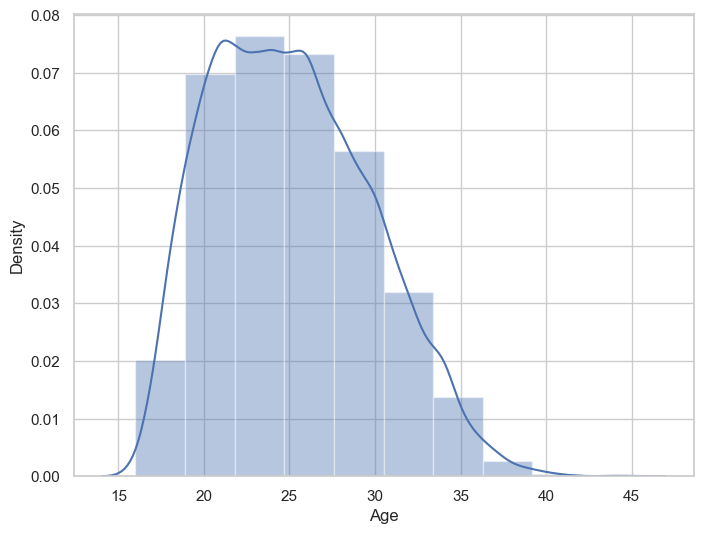

In [30]:
f, ax = plt.subplots(figsize=(8,6))
x = fifa['Age']
ax = sns.distplot(x, bins=10)
plt.show()

### Comment

- It can be seen that the `Age` variable is slightly positively skewed.




We can use Pandas series object to get an informative axis label as follows-

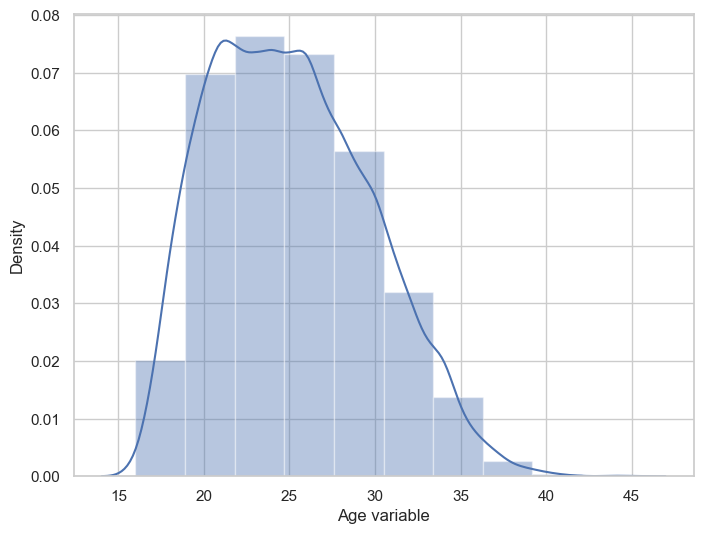

In [32]:
f, ax = plt.subplots(figsize=(8,6))
x = fifa['Age']
x = pd.Series(x, name="Age variable")
ax = sns.distplot(x, bins=10)
plt.show()

We can plot the distribution on the vertical axis as follows:-

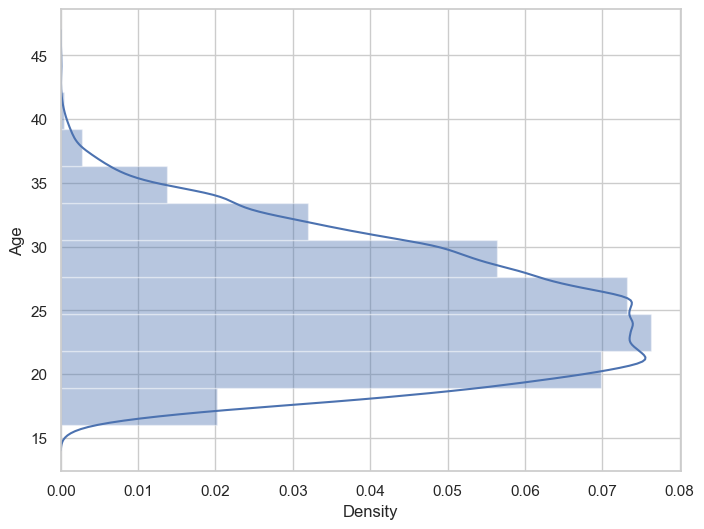

In [34]:
f, ax = plt.subplots(figsize=(8,6))
x = fifa['Age']
ax = sns.distplot(x, bins=10, vertical = True)
plt.show()

### Seaborn Kernel Density Estimation (KDE) Plot


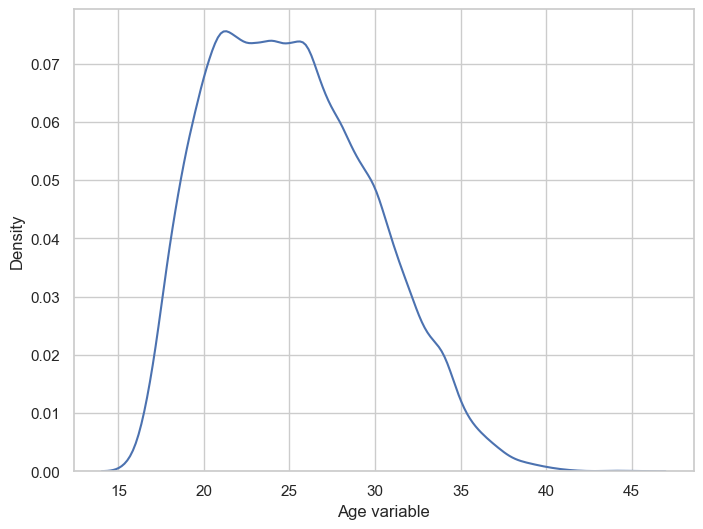

In [36]:
f, ax = plt.subplots(figsize=(8,6))
x = fifa['Age']
x = pd.Series(x, name="Age variable")
ax = sns.kdeplot(x)
plt.show()

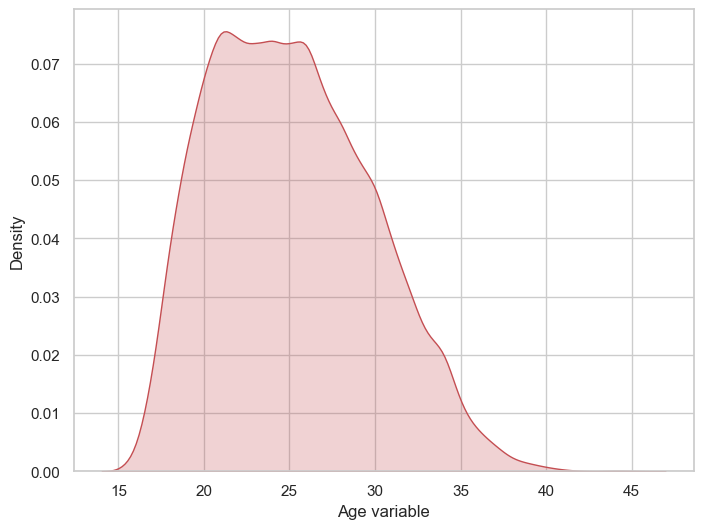

In [37]:
f, ax = plt.subplots(figsize=(8,6))
x = fifa['Age']
x = pd.Series(x, name="Age variable")
ax = sns.kdeplot(x, shade=True, color='r')
plt.show()

### Histograms


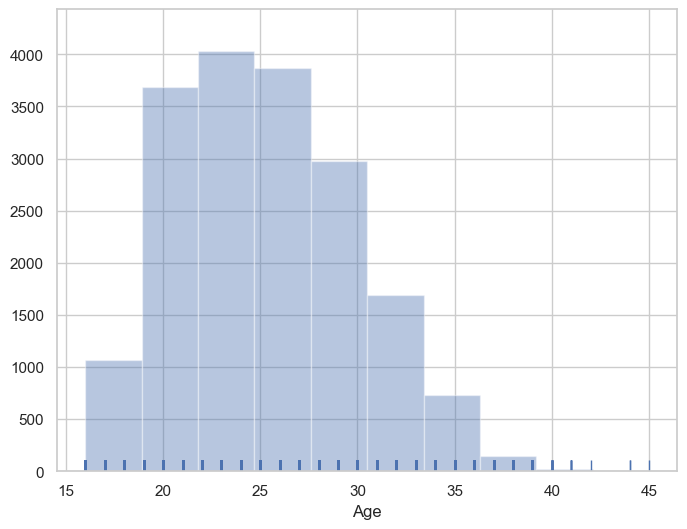

In [39]:
f, ax = plt.subplots(figsize=(8,6))
x = fifa['Age']
ax = sns.distplot(x, kde=False, rug=True, bins=10)
plt.show()

We can plot a KDE plot alternatively as follows:-

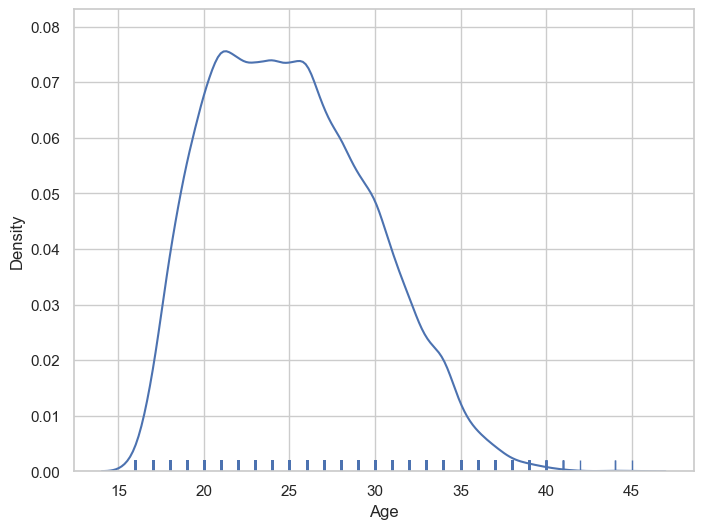

In [42]:
f, ax = plt.subplots(figsize=(8,6))
x = fifa['Age']
ax = sns.distplot(x, hist=False, rug=True, bins=10)
plt.show()

### Explore `Preferred Foot` variable

### Check number of unique values in `Preferred Foot` variable

In [44]:
fifa['Preferred Foot'].nunique()

2

We can see that there are two types of unique values in `Preferred Foot` variable.

### Check frequency distribution of values in `Preferred Foot` variable

In [45]:
fifa['Preferred Foot'].value_counts()

Preferred Foot
Right    13948
Left      4211
Name: count, dtype: int64

### Visualize distribution of values with Seaborn `countplot()` function.


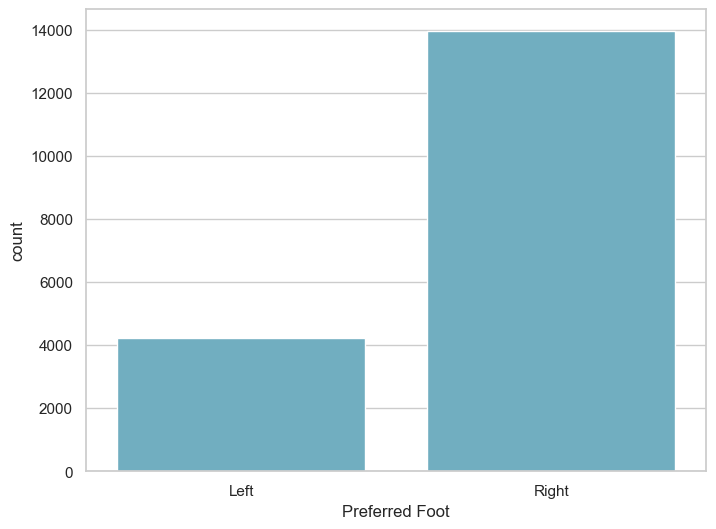

In [47]:
f, ax = plt.subplots(figsize=(8, 6))
sns.countplot(x="Preferred Foot", data=fifa, color="c")
plt.show()

We can show value counts for two categorical variables as follows-

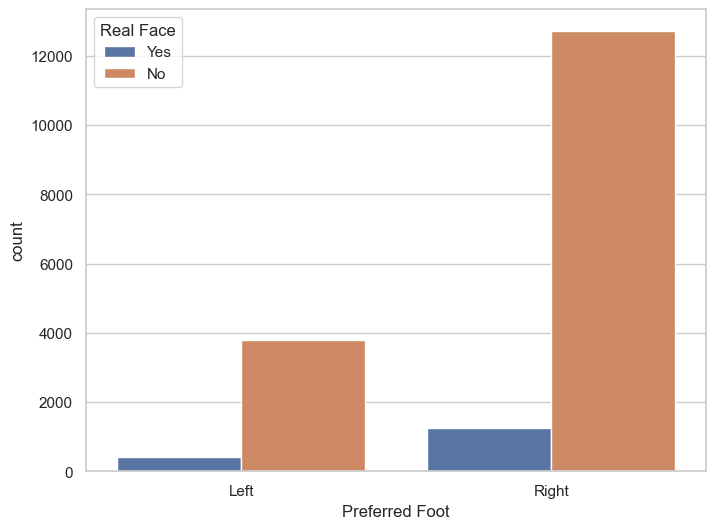

In [49]:
f, ax = plt.subplots(figsize=(8, 6))
sns.countplot(x="Preferred Foot", hue="Real Face", data=fifa)
plt.show()

We can draw plot vertically as follows-

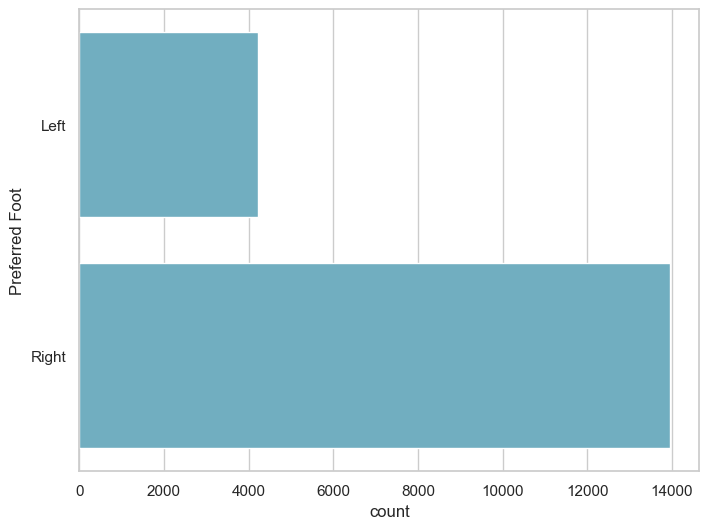

In [50]:
f, ax = plt.subplots(figsize=(8, 6))
sns.countplot(y="Preferred Foot", data=fifa, color="c")
plt.show()

 ### Seaborn Catplot() function¶

We can use the kind parameter to draw different plot kin to visualize the same data. We can use the Seaborn `catplot()` function to draw a `countplot()` as follows-

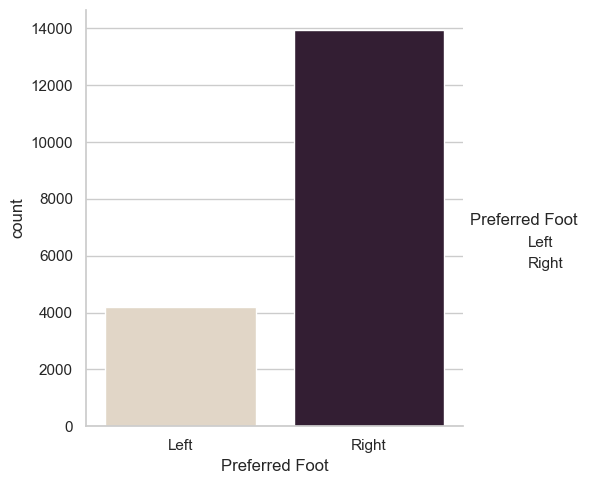

In [51]:
g = sns.catplot(x="Preferred Foot", kind="count", palette="ch:.25", data=fifa)

### Explore `International Reputation` variable

### Check the number of unique values in `International Reputation` variable

In [53]:
fifa['International Reputation'].nunique()

5

### Check the distribution of values in `International Reputation` variable

In [54]:
fifa['International Reputation'].value_counts()

International Reputation
1.0    16532
2.0     1261
3.0      309
4.0       51
5.0        6
Name: count, dtype: int64

### Seaborn `Stripplot()` function


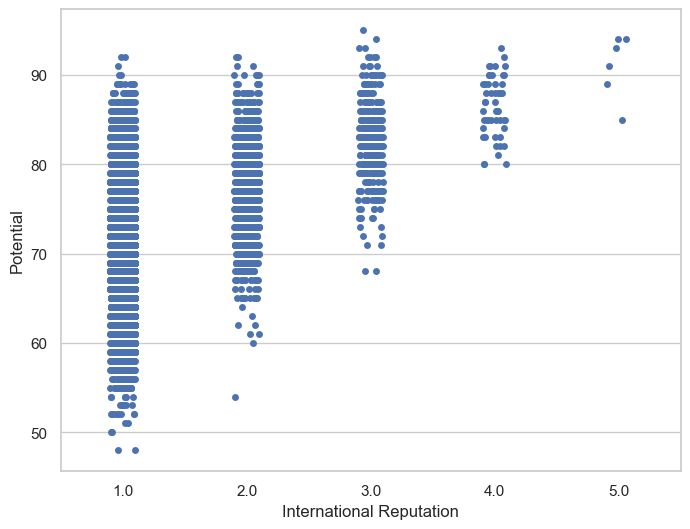

In [55]:
f, ax = plt.subplots(figsize=(8, 6))
sns.stripplot(x="International Reputation", y="Potential", data=fifa)
plt.show()

We can add jitter to bring out the distribution of values as follows-

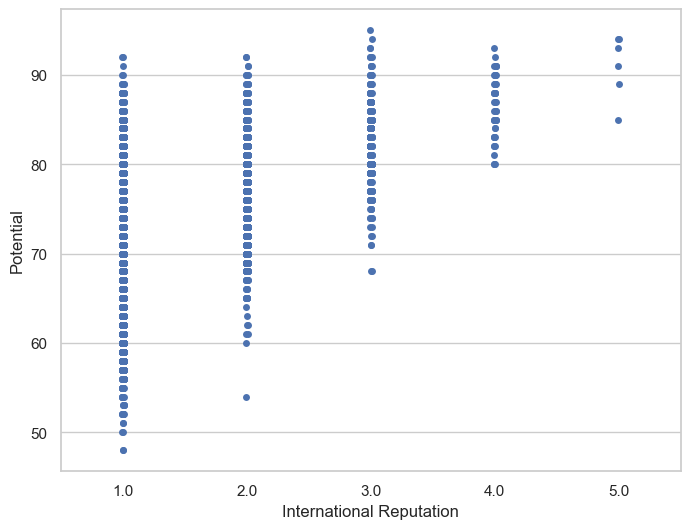

In [56]:
f, ax = plt.subplots(figsize=(8, 6))
sns.stripplot(x="International Reputation", y="Potential", data=fifa, jitter=0.01)
plt.show()

We can nest the strips within a second categorical variable - `Preferred Foot` as folows-

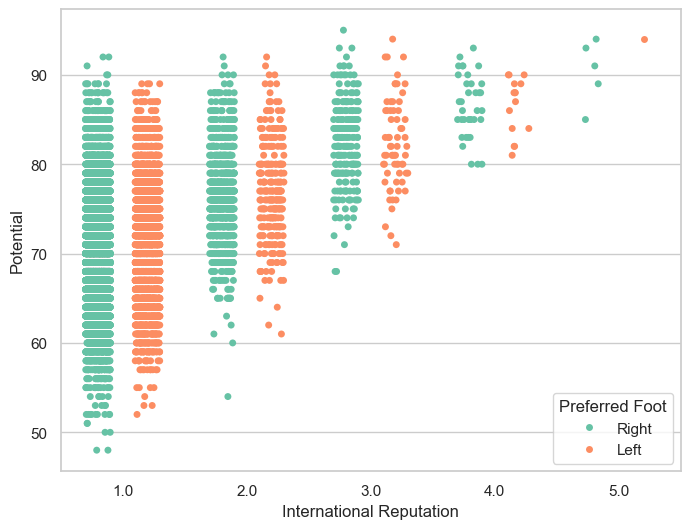

In [57]:
f, ax = plt.subplots(figsize=(8, 6))
sns.stripplot(x="International Reputation", y="Potential", hue="Preferred Foot", 
                   data=fifa, jitter=0.2, palette="Set2", dodge=True)
plt.show()

We can draw strips with large points and different aesthetics as follows-

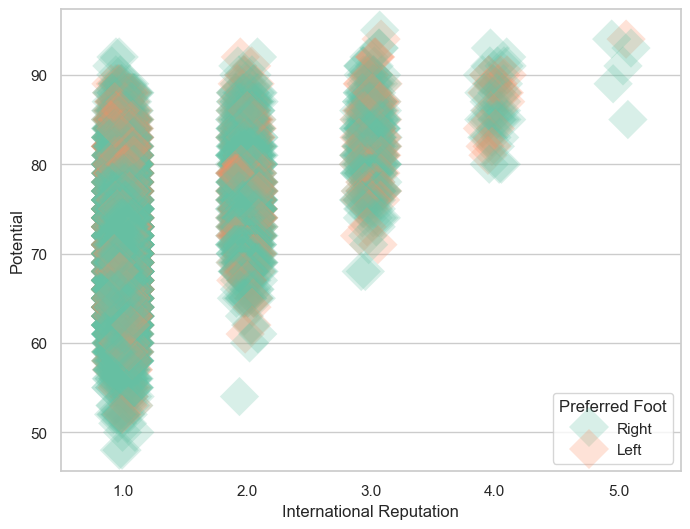

In [58]:
f, ax = plt.subplots(figsize=(8, 6))
sns.stripplot(x="International Reputation", y="Potential", hue="Preferred Foot", 
                   data=fifa, palette="Set2", size=20, marker="D",
                   edgecolor="gray", alpha=.25)
plt.show()

### Seaborn `boxplot()` function


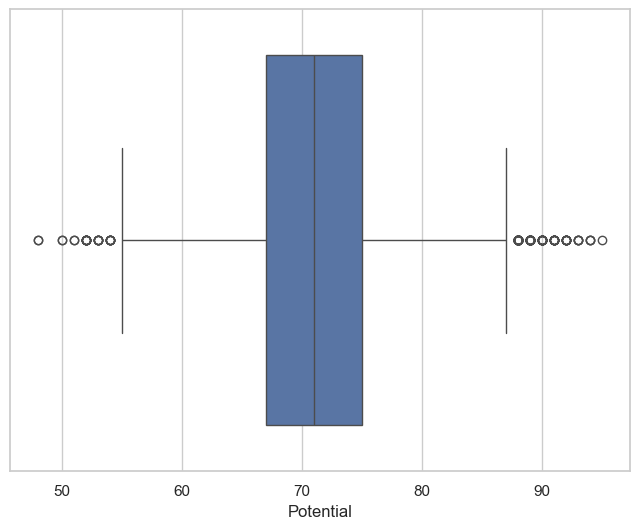

In [59]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=fifa["Potential"])
plt.show()

We can draw the vertical boxplot grouped by the categorical variable `International Reputation` as follows-

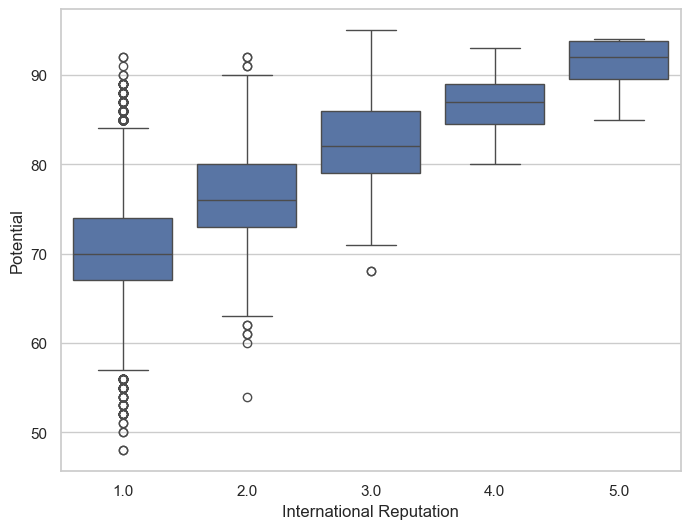

In [60]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x="International Reputation", y="Potential", data=fifa)
plt.show()

We can draw a boxplot with nested grouping by two categorical variables as follows-

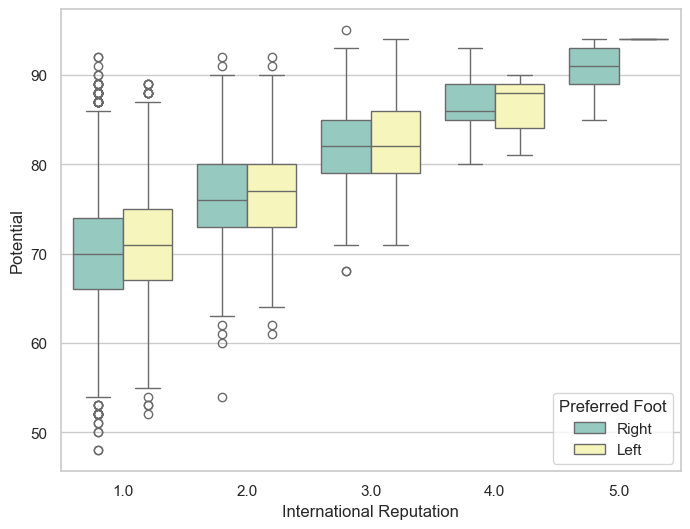

In [61]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x="International Reputation", y="Potential", hue="Preferred Foot", data=fifa, palette="Set3")
plt.show()

### Seaborn `violinplot()` function


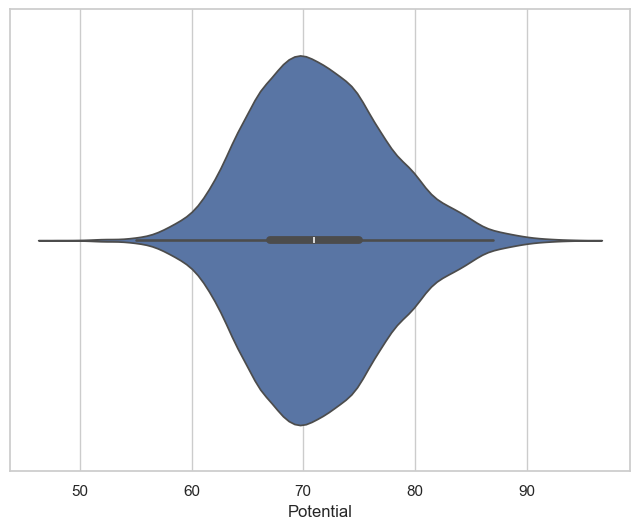

In [62]:
f, ax = plt.subplots(figsize=(8, 6))
sns.violinplot(x=fifa["Potential"])
plt.show()

We can draw the vertical violinplot grouped by the categorical variable `International Reputation` as follows-

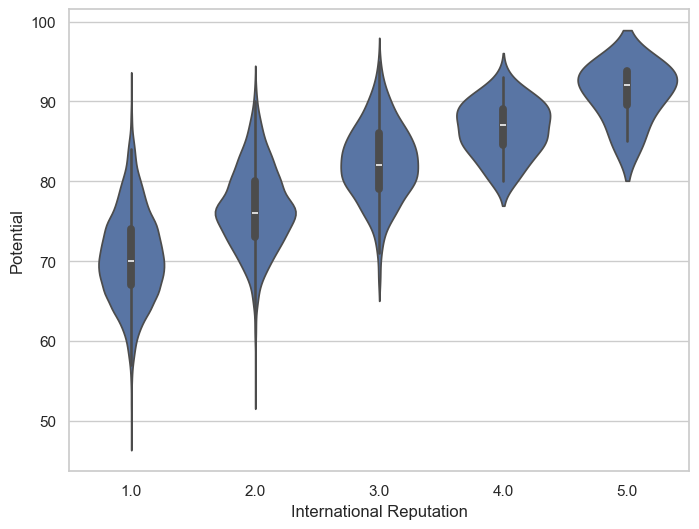

In [63]:
f, ax = plt.subplots(figsize=(8, 6))
sns.violinplot(x="International Reputation", y="Potential", data=fifa)
plt.show()

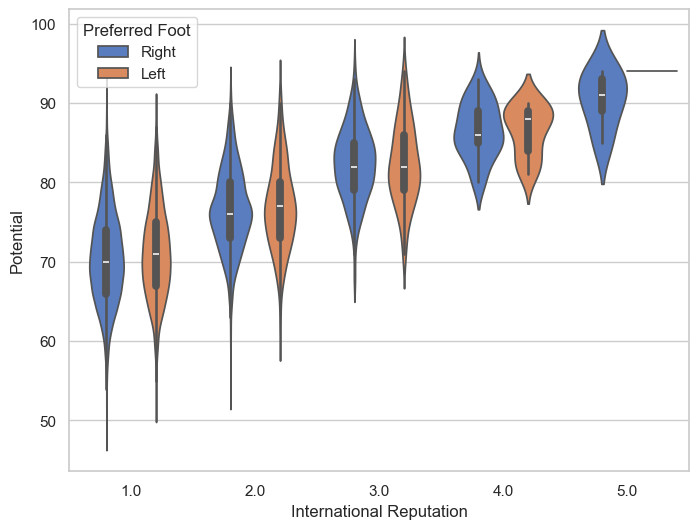

In [64]:
f, ax = plt.subplots(figsize=(8, 6))
sns.violinplot(x="International Reputation", y="Potential", hue="Preferred Foot", data=fifa, palette="muted")
plt.show()

We can draw split violins to compare the across the hue variable as follows-

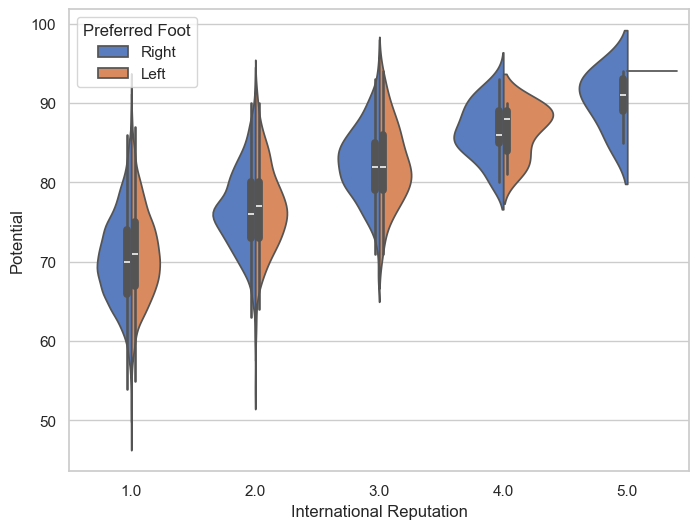

In [65]:
f, ax = plt.subplots(figsize=(8, 6))
sns.violinplot(x="International Reputation", y="Potential", hue="Preferred Foot", 
               data=fifa, palette="muted", split=True)
plt.show()

### Seaborn `pointplot()` function


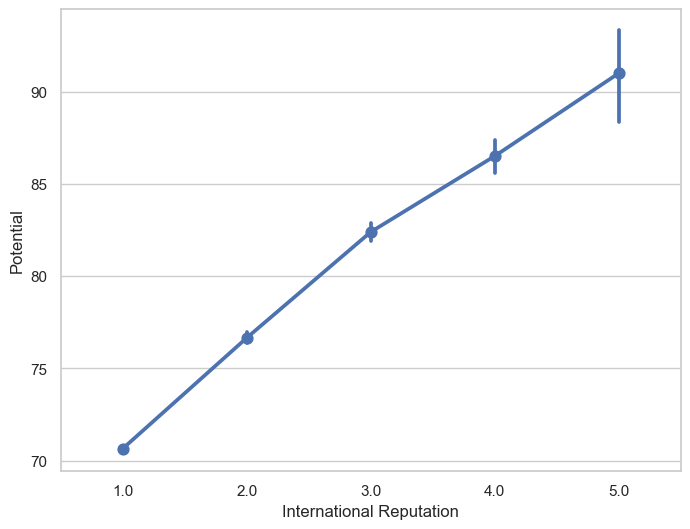

In [67]:
f, ax = plt.subplots(figsize=(8, 6))
sns.pointplot(x="International Reputation", y="Potential", data=fifa)
plt.show()

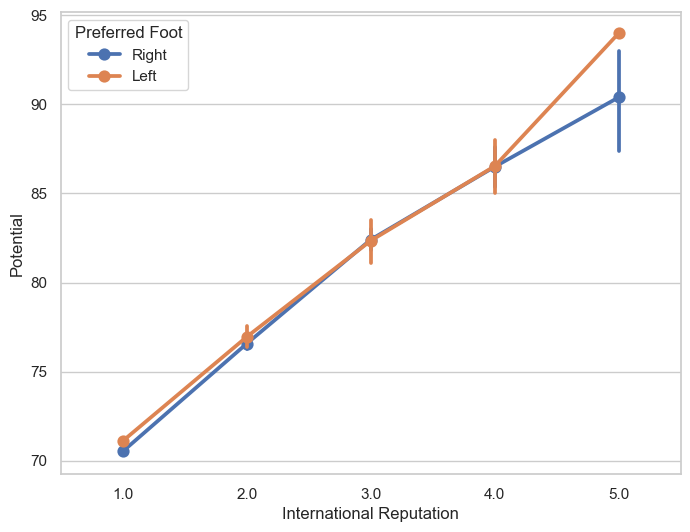

In [68]:
f, ax = plt.subplots(figsize=(8, 6))
sns.pointplot(x="International Reputation", y="Potential", hue="Preferred Foot", data=fifa)
plt.show()

We can separate the points for different hue levels along the categorical axis as follows-

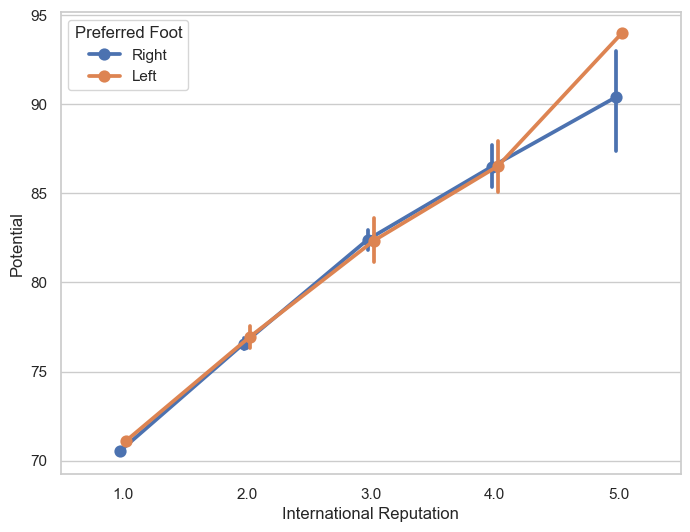

In [69]:
f, ax = plt.subplots(figsize=(8, 6))
sns.pointplot(x="International Reputation", y="Potential", hue="Preferred Foot", data=fifa, dodge=True)
plt.show()

We can use a different marker and line style for the hue levels as follows-

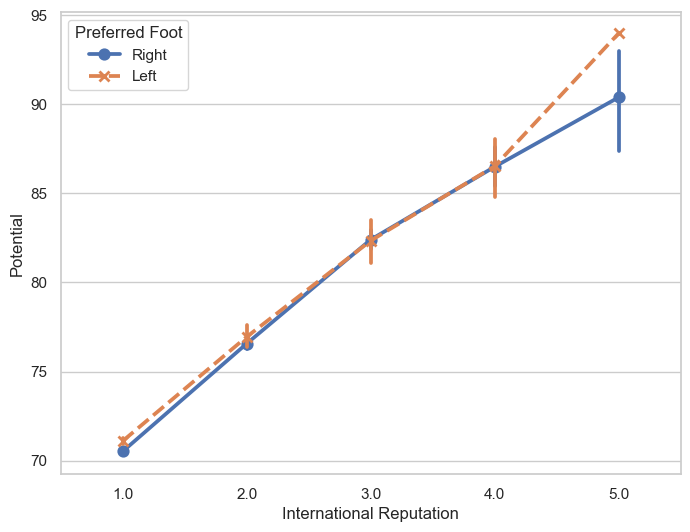

In [70]:
f, ax = plt.subplots(figsize=(8, 6))
sns.pointplot(x="International Reputation", y="Potential", hue="Preferred Foot", 
              data=fifa, markers=["o", "x"], linestyles=["-", "--"])
plt.show()

### Seaborn `barplot()` function


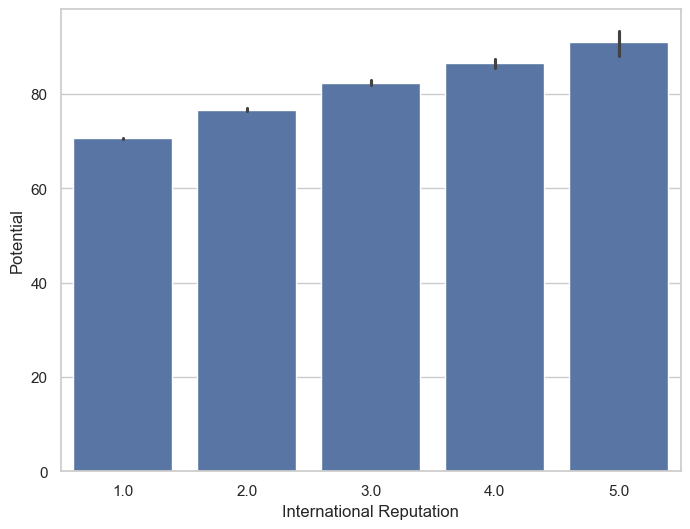

In [71]:
f, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x="International Reputation", y="Potential", data=fifa)
plt.show()

We can draw a set of vertical bars with nested grouping by a two variables as follows-

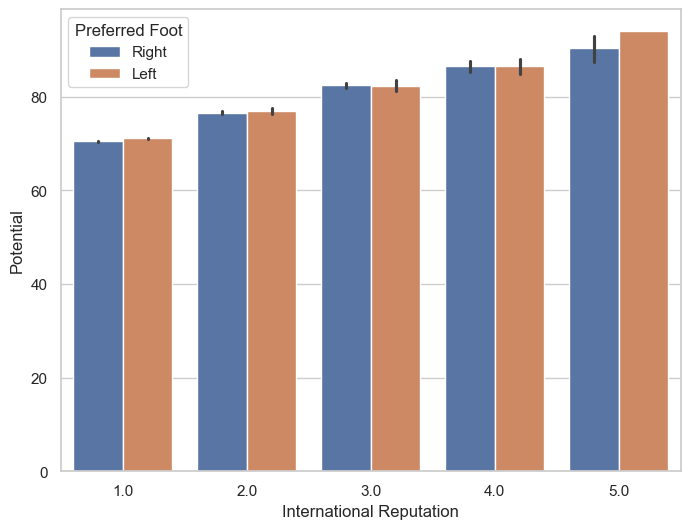

In [72]:
f, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x="International Reputation", y="Potential", hue="Preferred Foot", data=fifa)
plt.show()

We can use median as the estimate of central tendency as follows-

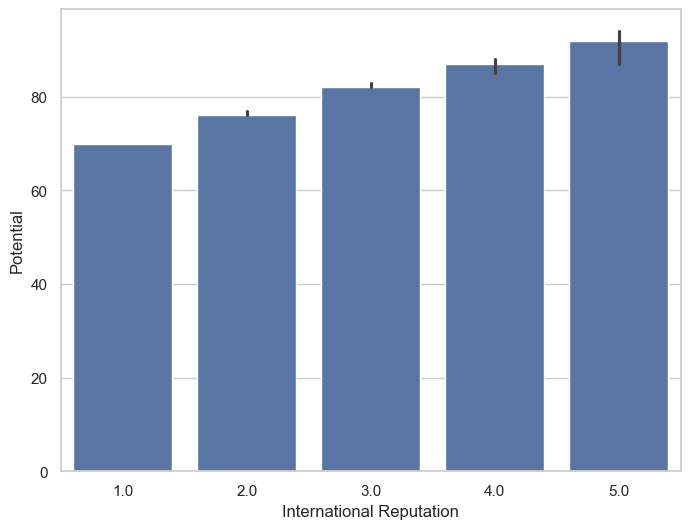

In [73]:
from numpy import median
f, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x="International Reputation", y="Potential", data=fifa, estimator=median)
plt.show()

We can show the standard error of the mean with the error bars as follows-

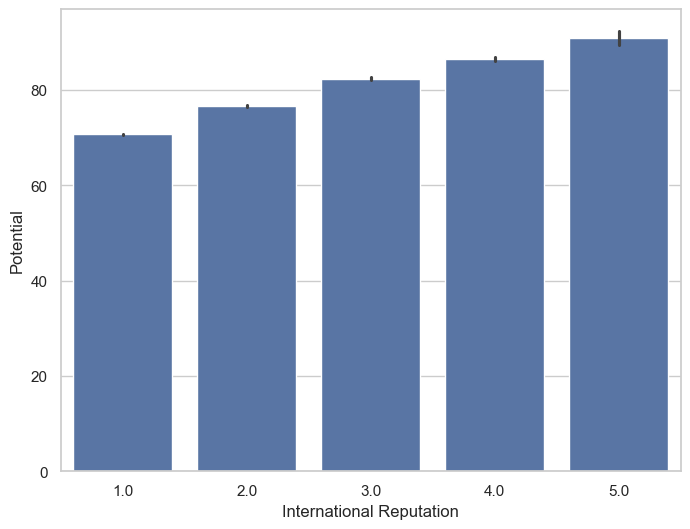

In [74]:
f, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x="International Reputation", y="Potential", data=fifa, ci=68)
plt.show()

We can show standard deviation of observations instead of a confidence interval as follows-

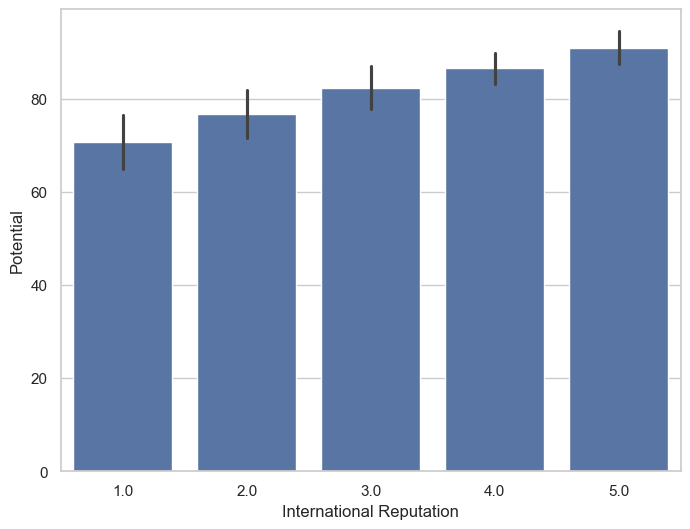

In [75]:
f, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x="International Reputation", y="Potential", data=fifa, ci="sd")
plt.show()

We can add “caps” to the error bars as follows-

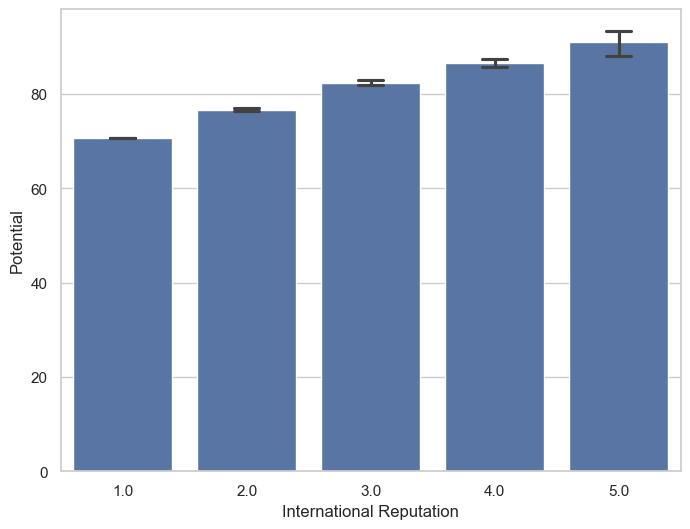

In [76]:
f, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x="International Reputation", y="Potential", data=fifa, capsize=0.2)
plt.show()

### Visualizing statistical relationship with Seaborn `relplot()` function

### Seaborn `relplot()` function


We can plot a scatterplot with variables `Heigh` and `Weight` with Seaborn `relplot()` function as follows-

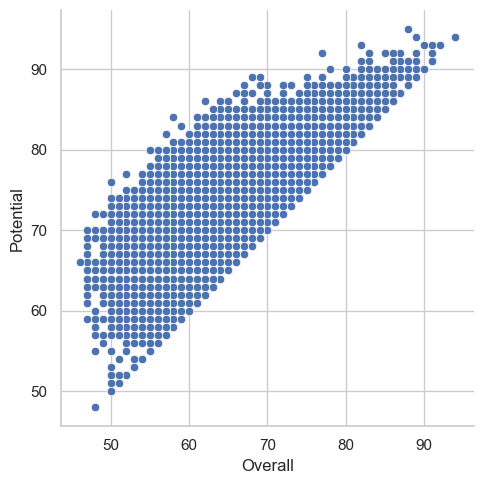

In [77]:
g = sns.relplot(x="Overall", y="Potential", data=fifa)

### Seaborn `scatterplot()` function


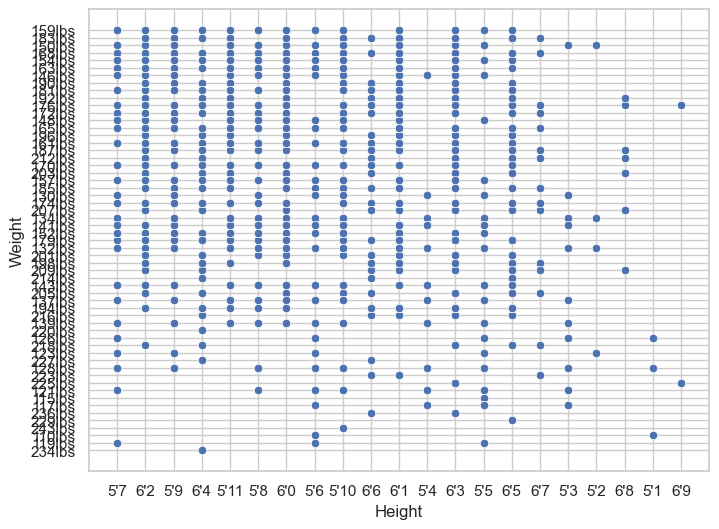

In [79]:
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x="Height", y="Weight", data=fifa)
plt.show()

### Seaborn `lineplot()` function


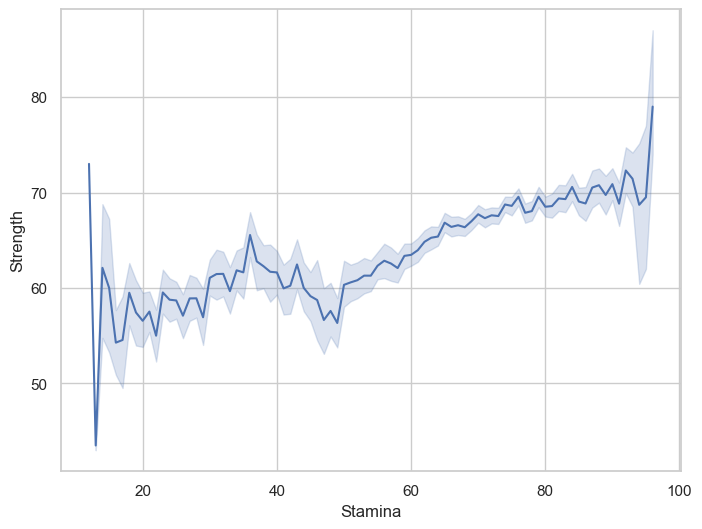

In [80]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.lineplot(x="Stamina", y="Strength", data=fifa)
plt.show()

### Visualize linear relationship with Seaborn `regplot()` function

### Seaborn `regplot()` function


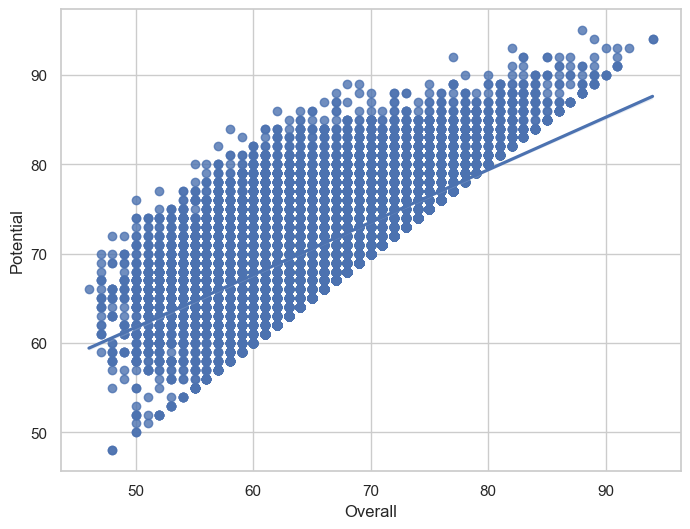

In [81]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.regplot(x="Overall", y="Potential", data=fifa)
plt.show()

We can use a different color and marker as follows-

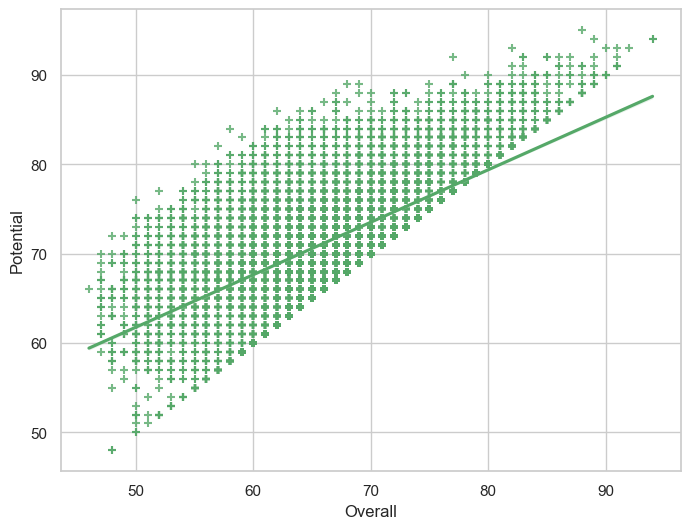

In [82]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.regplot(x="Overall", y="Potential", data=fifa, color= "g", marker="+")
plt.show()

We can plot with a discrete variable and add some jitter as follows-

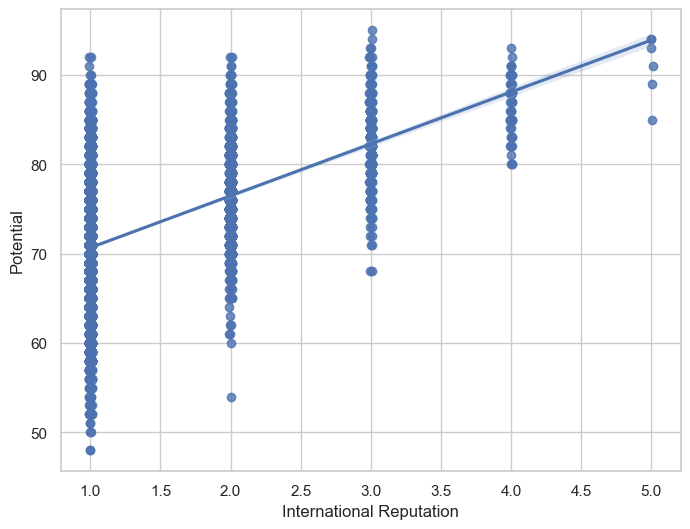

In [83]:
f, ax = plt.subplots(figsize=(8, 6))
sns.regplot(x="International Reputation", y="Potential", data=fifa, x_jitter=.01)
plt.show()

### Seaborn `lmplot()` function


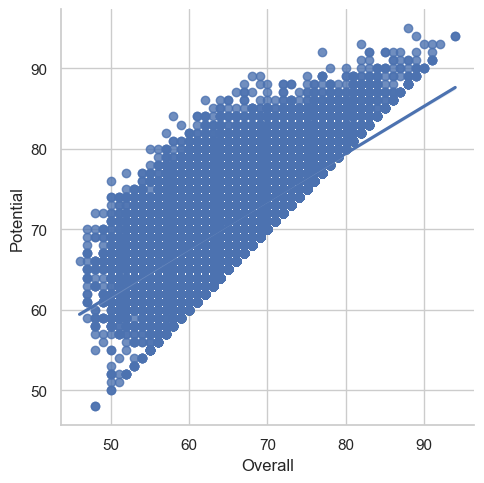

In [85]:
g= sns.lmplot(x="Overall", y="Potential", data=fifa)


We can condition on a third variable and plot the levels in different colors as follows-

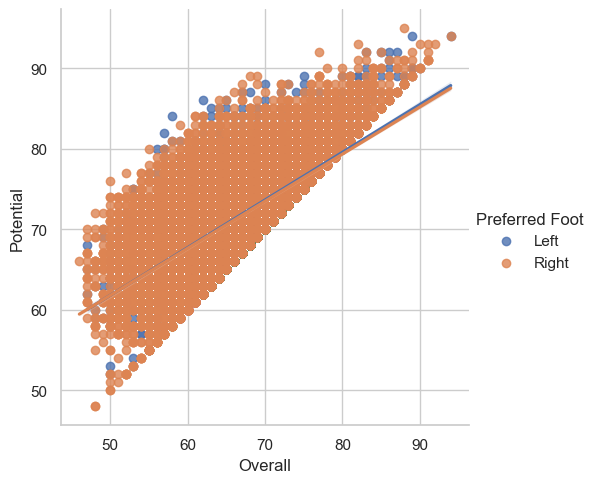

In [86]:
g= sns.lmplot(x="Overall", y="Potential", hue="Preferred Foot", data=fifa)

We can use a different color palette as follows-

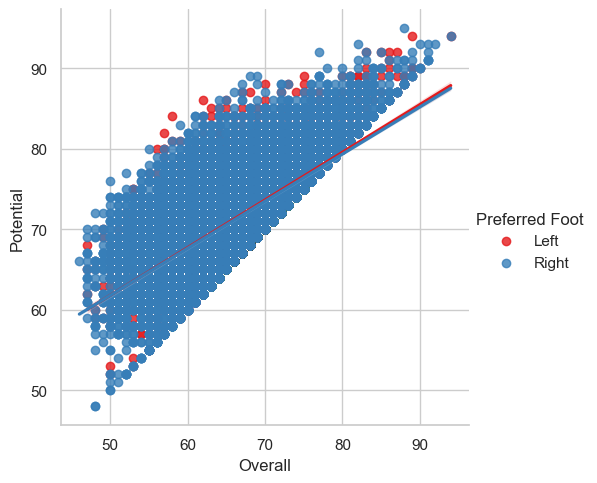

In [87]:
g= sns.lmplot(x="Overall", y="Potential", hue="Preferred Foot", data=fifa, palette="Set1")

We can plot the levels of the third variable across different columns as follows-

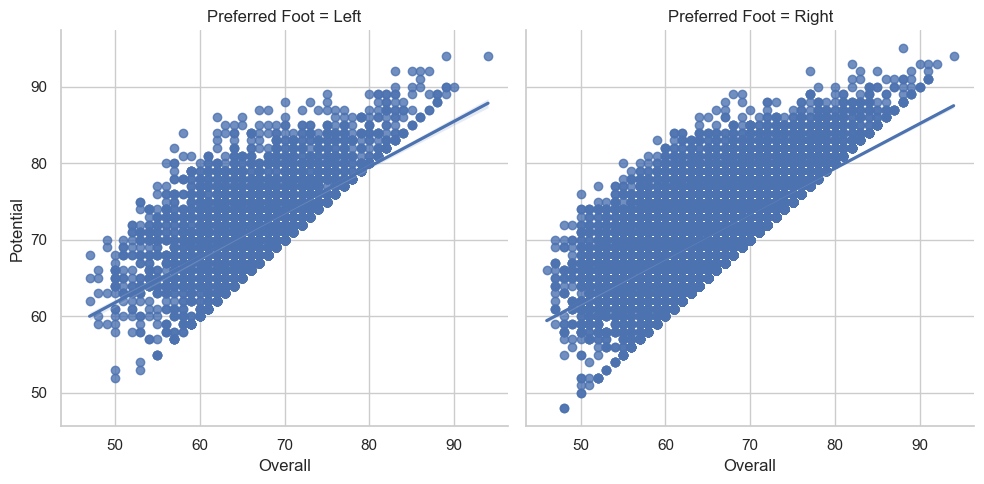

In [88]:
g= sns.lmplot(x="Overall", y="Potential", col="Preferred Foot", data=fifa)

### Multi-plot grids

### Seaborn `FacetGrid()` function


We can initialize a 1x2 grid of facets using the fifa dataset.

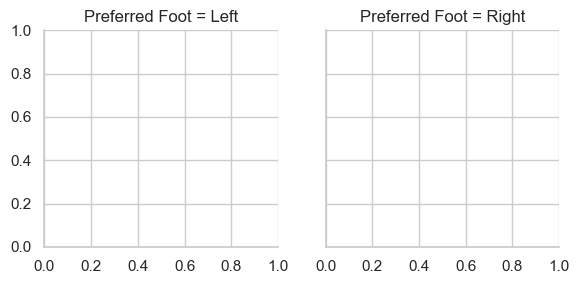

In [89]:
g = sns.FacetGrid(fifa, col="Preferred Foot")

We can draw a univariate plot of `Potential` variable on each facet as follows-

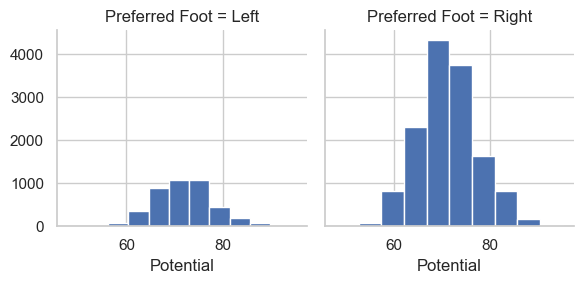

In [90]:
g = sns.FacetGrid(fifa, col="Preferred Foot")
g = g.map(plt.hist, "Potential")

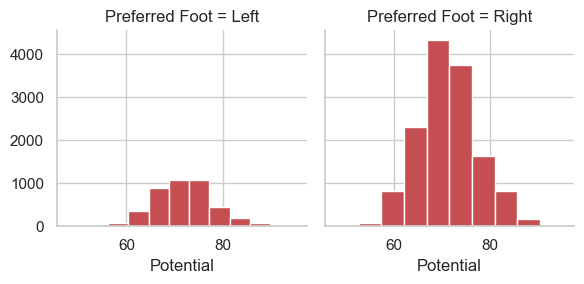

In [91]:
g = sns.FacetGrid(fifa, col="Preferred Foot")
g = g.map(plt.hist, "Potential", bins=10, color="r")

We can plot a bivariate function on each facet as follows-

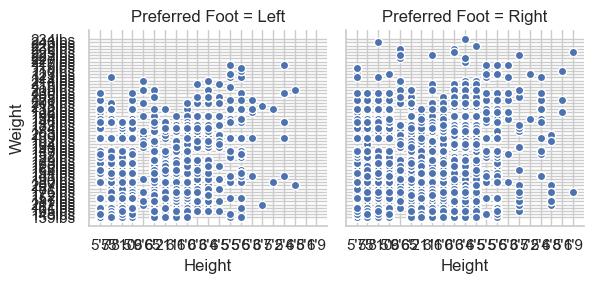

In [92]:
g = sns.FacetGrid(fifa, col="Preferred Foot")
g = (g.map(plt.scatter, "Height", "Weight", edgecolor="w").add_legend())

The size of the figure is set by providing the height of each facet, along with the aspect ratio:

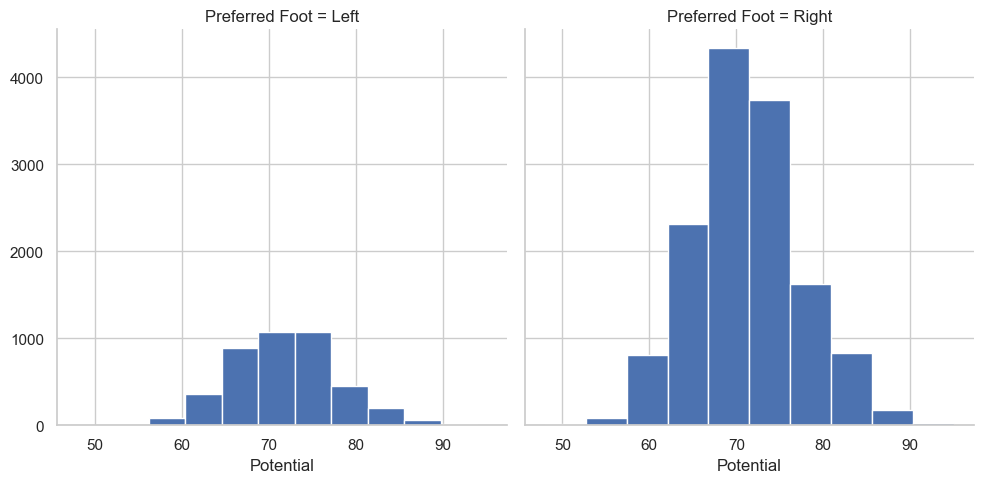

In [93]:
g = sns.FacetGrid(fifa, col="Preferred Foot", height=5, aspect=1)
g = g.map(plt.hist, "Potential")

### Seaborn `Pairgrid()` function


In [96]:
fifa_new = fifa[['Age', 'Potential', 'Strength', 'Stamina', 'Preferred Foot']]

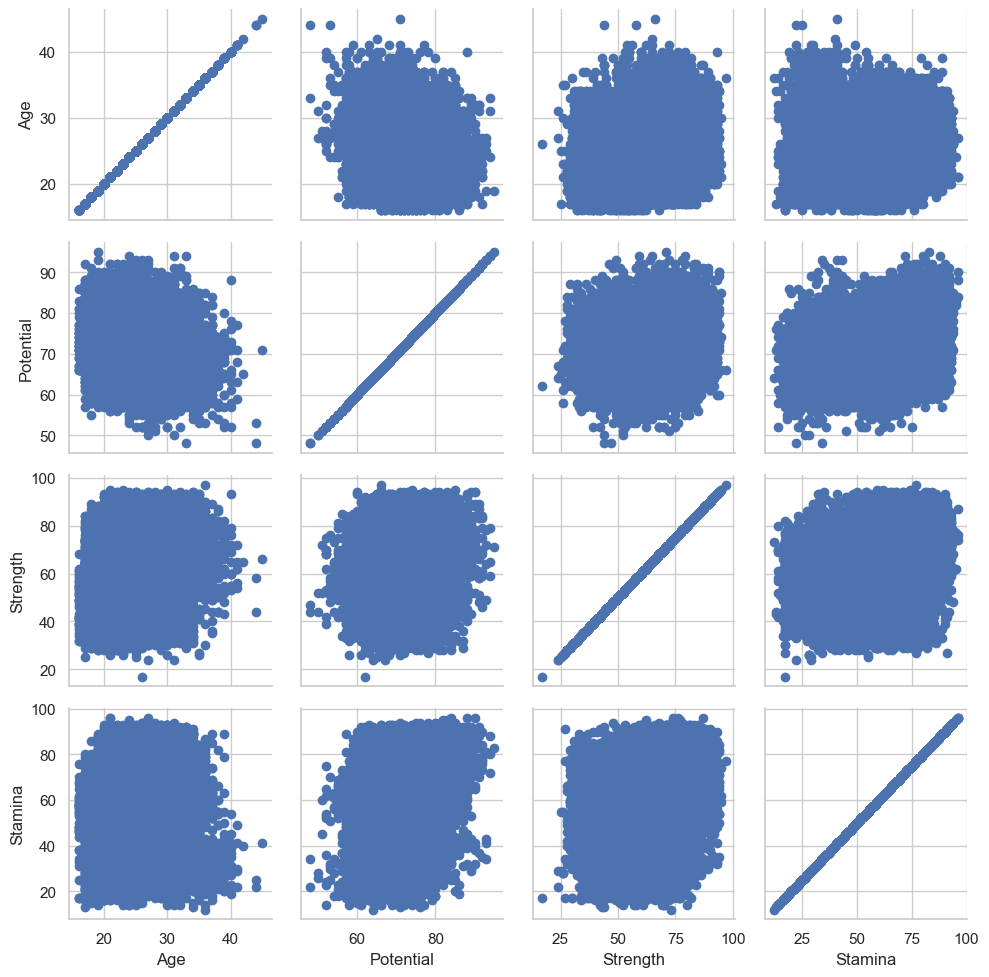

In [97]:
g = sns.PairGrid(fifa_new)
g = g.map(plt.scatter)

We can show a univariate distribution on the diagonal as follows-

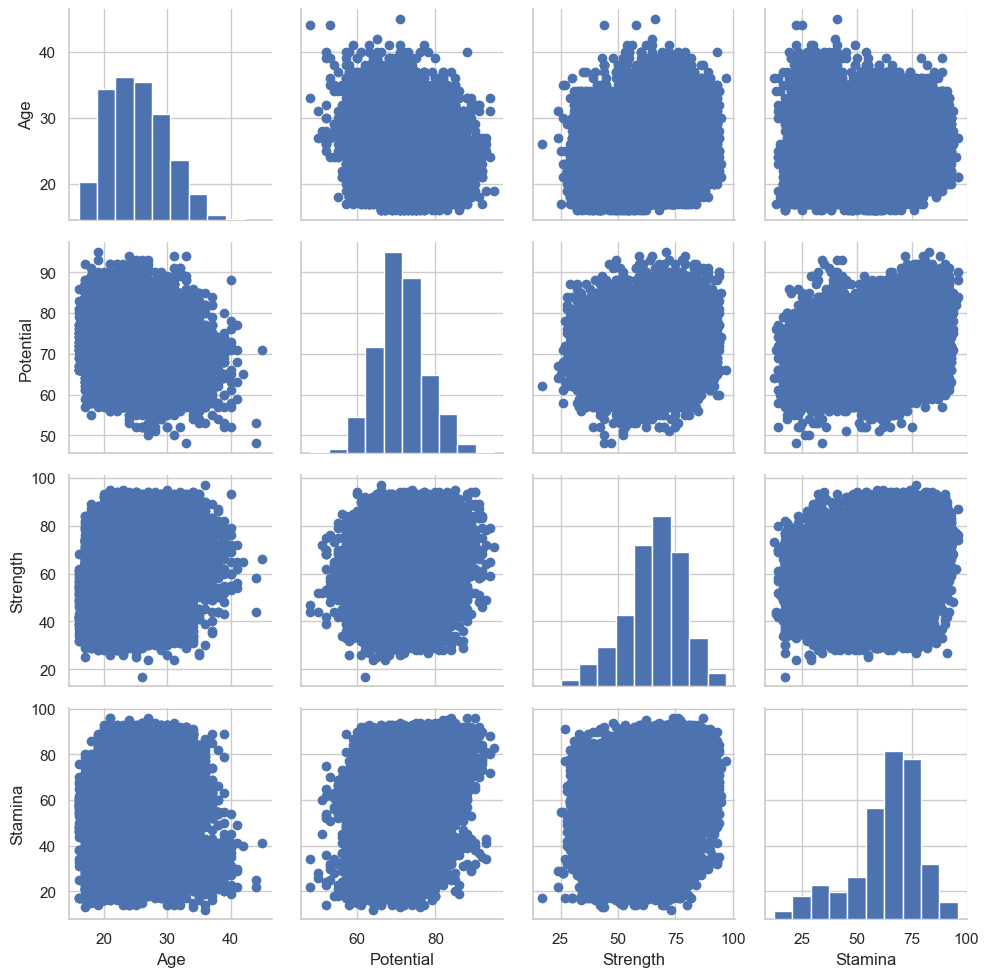

In [98]:
g = sns.PairGrid(fifa_new)
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)

We can color the points using the categorical variable `Preferred Foot` as follows -

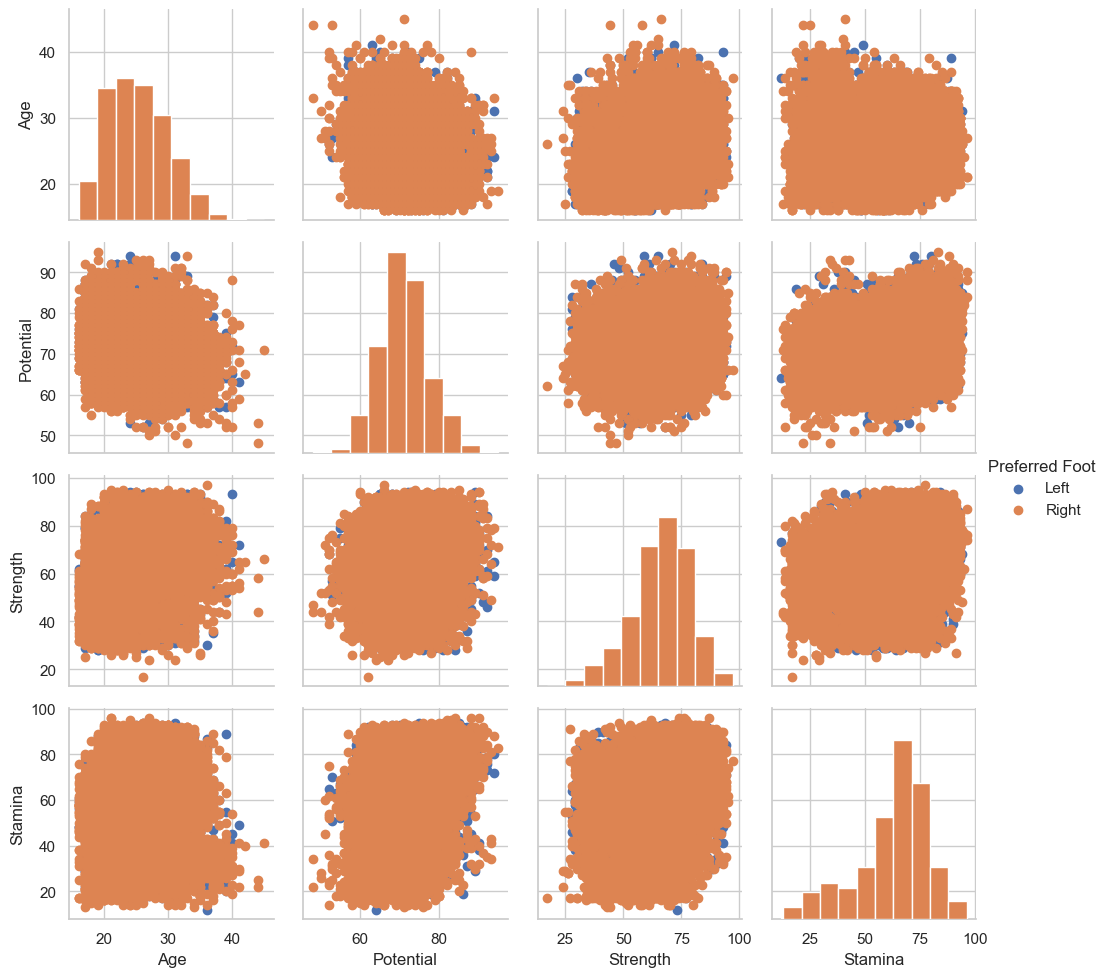

In [99]:
g = sns.PairGrid(fifa_new, hue="Preferred Foot")
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)
g = g.add_legend()

We can use a different style to show multiple histograms as follows-

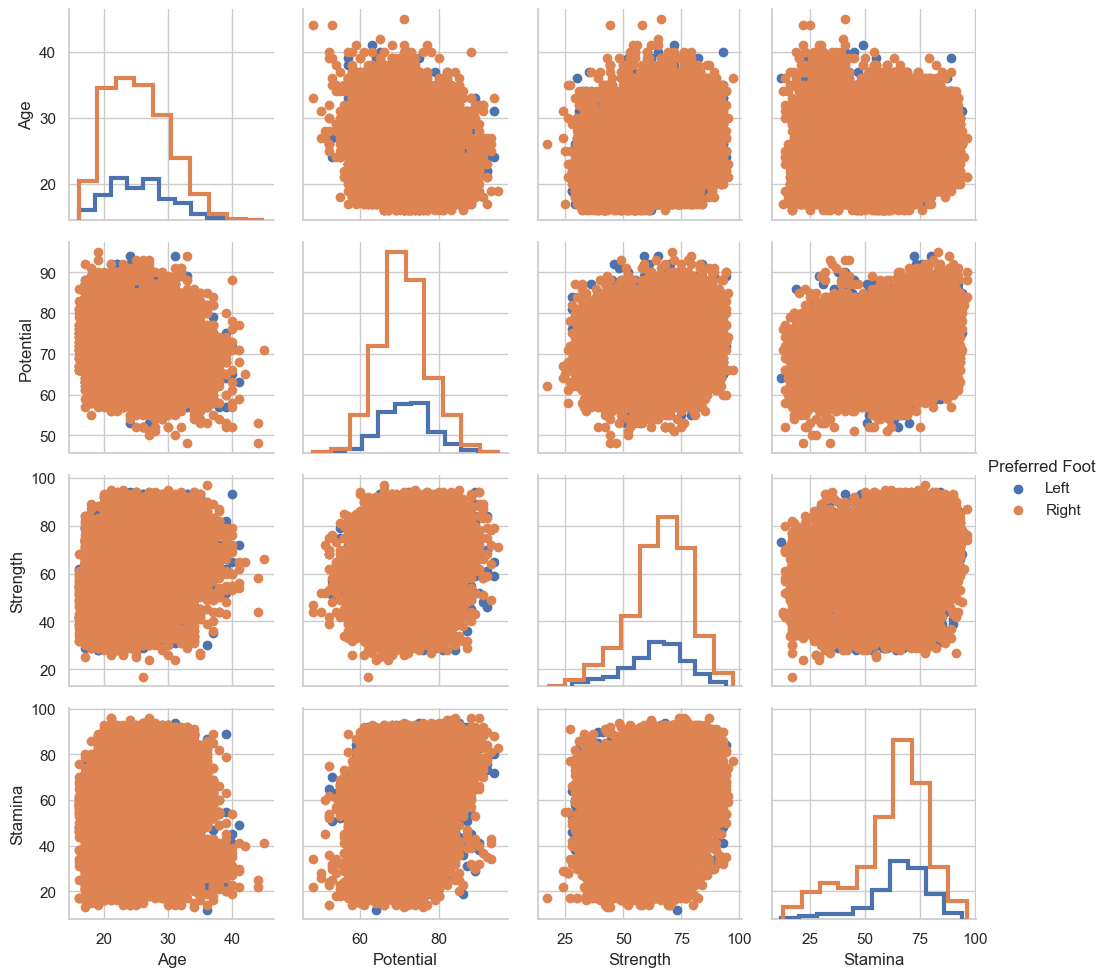

In [100]:
g = sns.PairGrid(fifa_new, hue="Preferred Foot")
g = g.map_diag(plt.hist, histtype="step", linewidth=3)
g = g.map_offdiag(plt.scatter)
g = g.add_legend()

We can plot a subset of variables as follows-

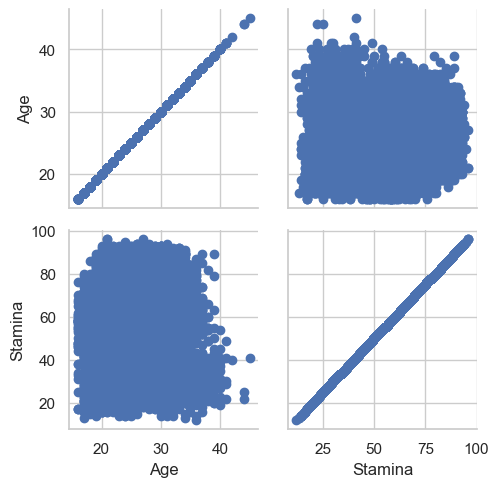

In [101]:
g = sns.PairGrid(fifa_new, vars=['Age', 'Stamina'])
g = g.map(plt.scatter)

We can use different functions on the upper and lower triangles as follows-

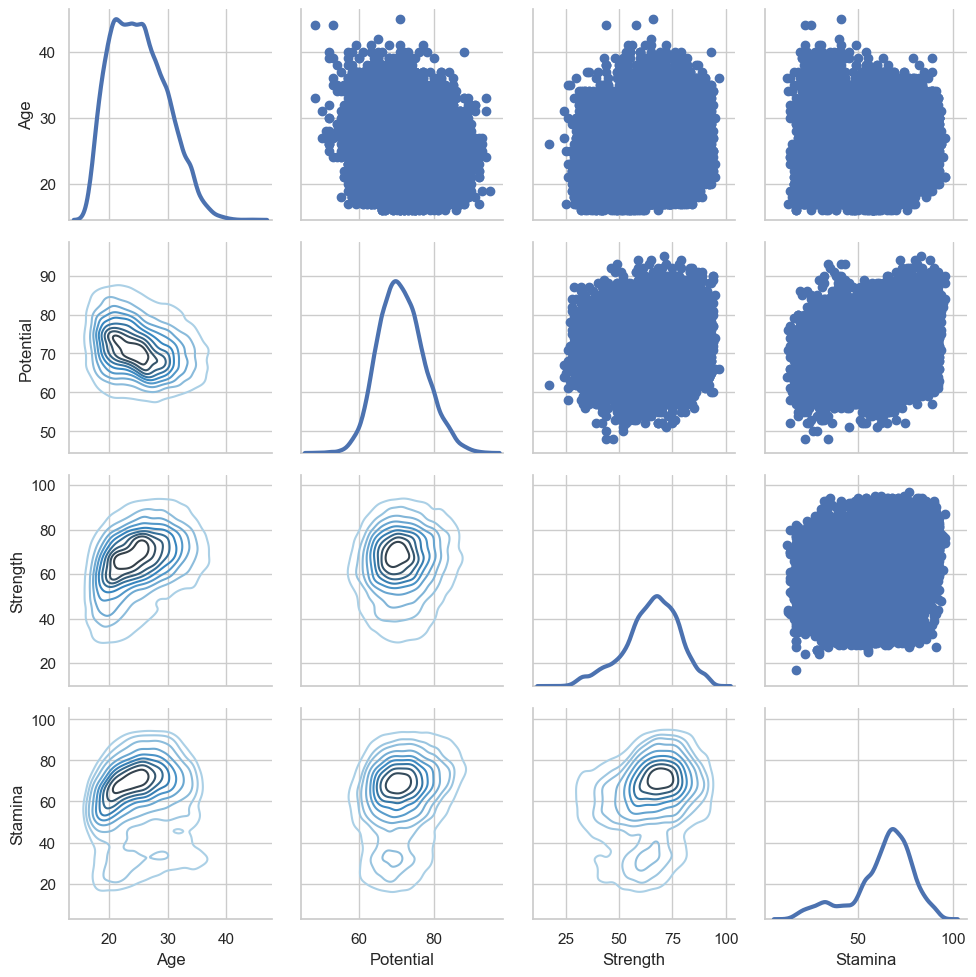

In [104]:
g = sns.PairGrid(fifa_new)
g = g.map_upper(plt.scatter)
g = g.map_lower(sns.kdeplot, cmap="Blues_d")
g = g.map_diag(sns.kdeplot, lw=3, legend=False)

### Seaborn `Jointgrid()` function


We can initialize the figure and add plots using default parameters as follows-

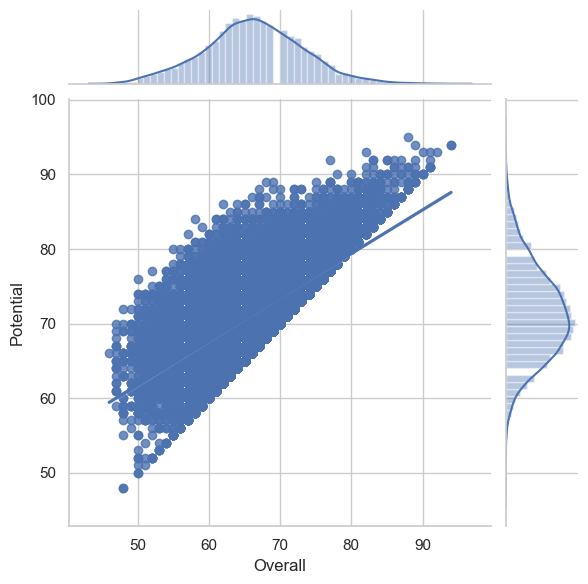

In [105]:
g = sns.JointGrid(x="Overall", y="Potential", data=fifa)
g = g.plot(sns.regplot, sns.distplot)

We can draw the join and marginal plots separately, which allows finer-level control other parameters as follows -

In [106]:
import matplotlib.pyplot as plt

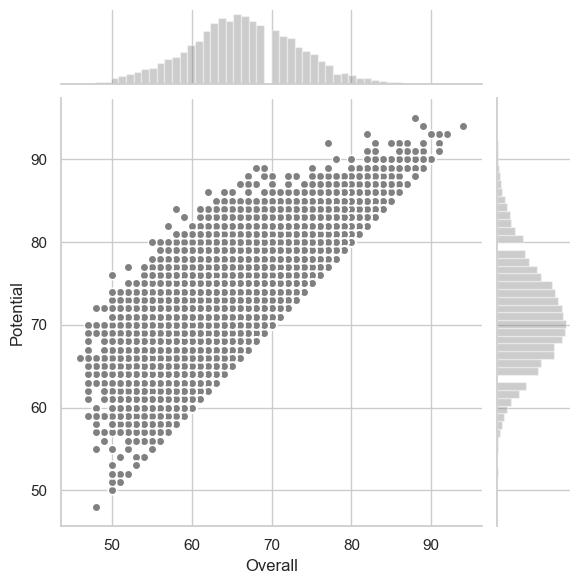

In [107]:
g = sns.JointGrid(x="Overall", y="Potential", data=fifa)
g = g.plot_joint(plt.scatter, color=".5", edgecolor="white")
g = g.plot_marginals(sns.distplot, kde=False, color=".5")

We can remove the space between the joint and marginal axes as follows -

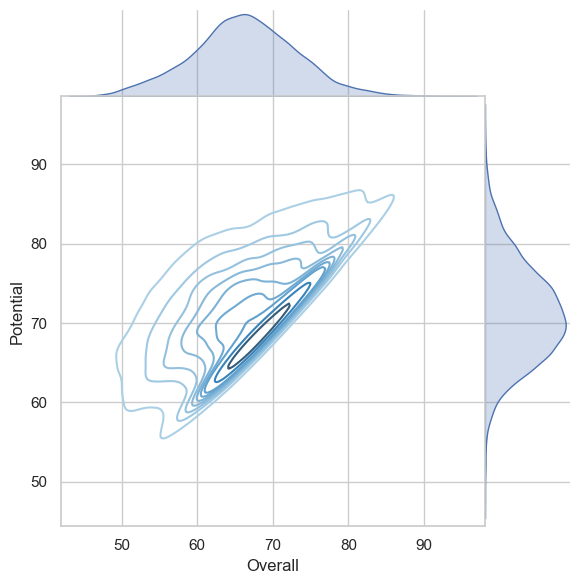

In [108]:
g = sns.JointGrid(x="Overall", y="Potential", data=fifa, space=0)
g = g.plot_joint(sns.kdeplot, cmap="Blues_d")
g = g.plot_marginals(sns.kdeplot, shade=True)

We can draw a smaller plot with relatively larger marginal axes as follows -

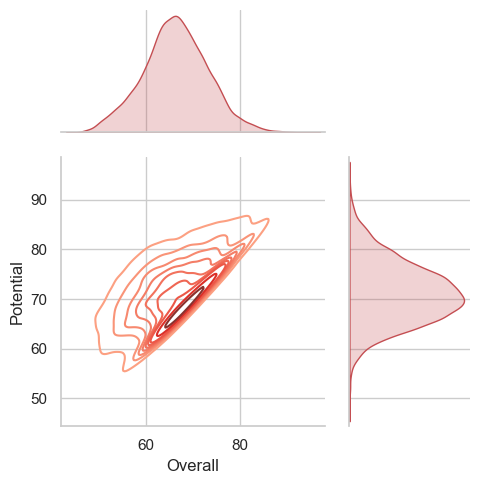

In [109]:
g = sns.JointGrid(x="Overall", y="Potential", data=fifa, height=5, ratio=2)
g = g.plot_joint(sns.kdeplot, cmap="Reds_d")
g = g.plot_marginals(sns.kdeplot, color="r", shade=True)

### Controlling the size and shape of the plot


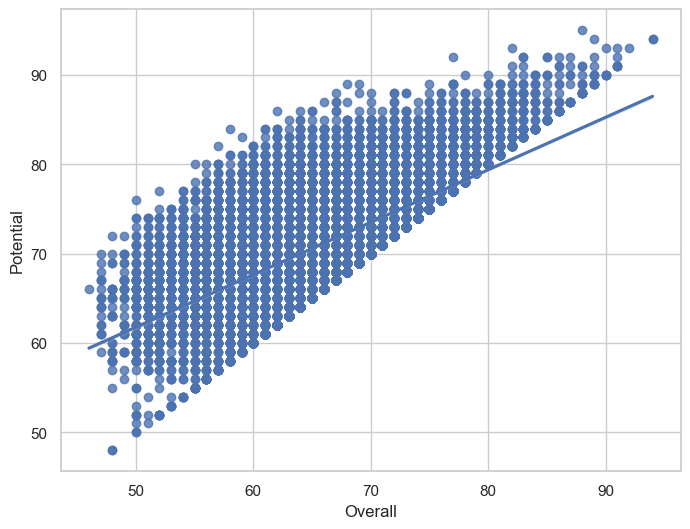

In [111]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.regplot(x="Overall", y="Potential", data=fifa);

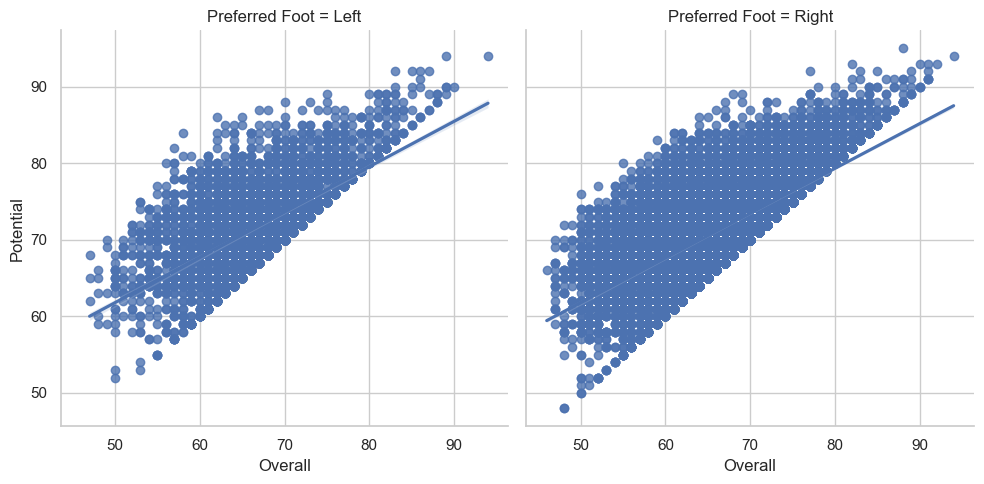

In [112]:
sns.lmplot(x="Overall", y="Potential", col="Preferred Foot", data=fifa, col_wrap=2, height=5, aspect=1)

### Seaborn figure styles


I will define a simple function to plot some offset sine waves, which will help us see the different stylistic parameters as follows -

In [113]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

This is what the plot looks like with matplotlib default parameters.

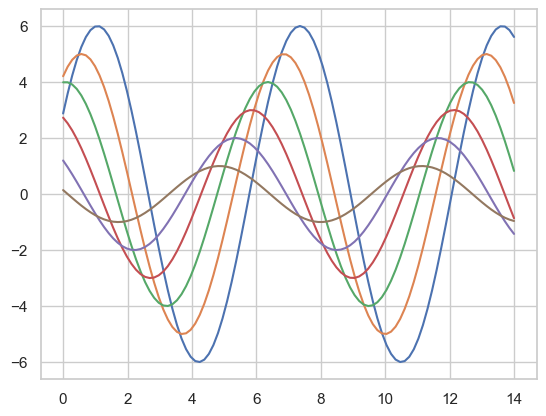

In [114]:
sinplot()

To switch to seaborn defaults, we need to call the `set()` function as follows -

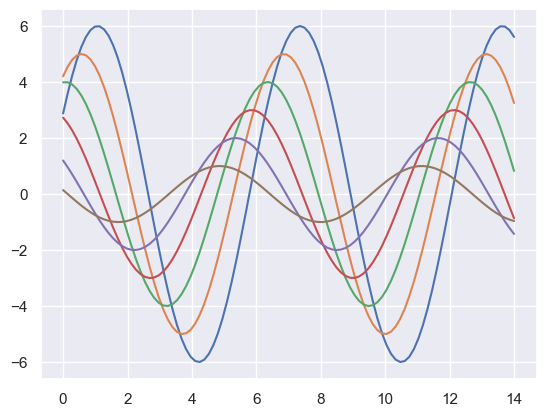

In [115]:
sns.set()
sinplot()

- We can set different styles as follows -

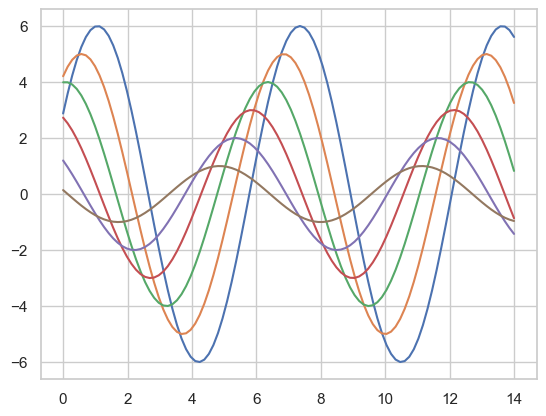

In [116]:
sns.set_style("whitegrid")
sinplot()

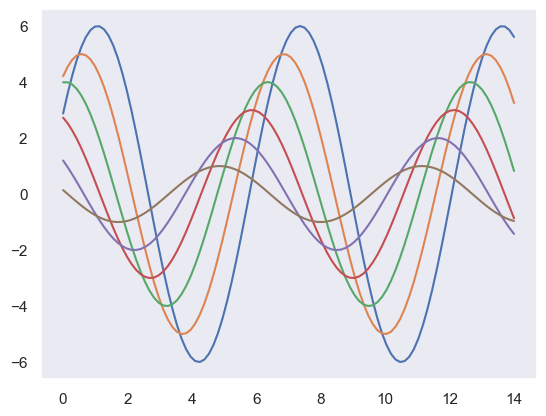

In [117]:
sns.set_style("dark")
sinplot()

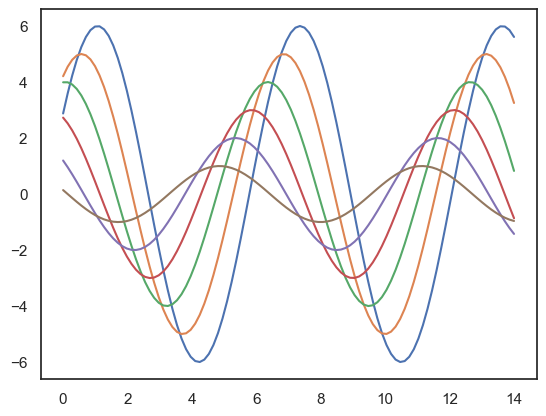

In [118]:
sns.set_style("white")
sinplot()

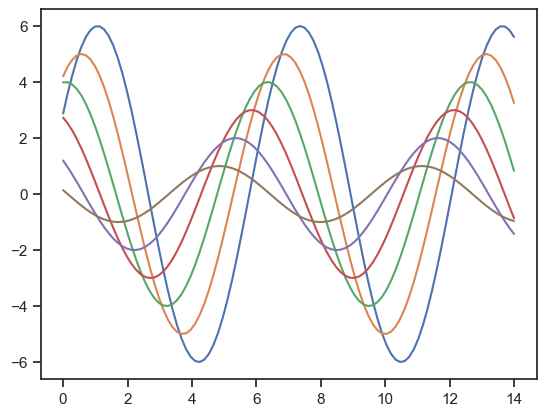

In [119]:
sns.set_style("ticks")
sinplot()